In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys

#sys.path.append("..\lflPython\fitTools")
from fitTools.Resonator import Resonator

In [3]:
datapath = 'G:\\Shared drives\\LFL\\Labber\\Data\\2022\\12\\Data_1212\\'
f_name = 'diss08-t2-vnaResSpec_tuneFlux_7.hdf5'

f = h5py.File(datapath + f_name,'r')

for key in f.keys():
    print(key)
    #print(type(f[key]))
#print('break')
#print(f['Data']['Data'])
for key in f['Data'].keys():
    #print(key)
    print(type(f['Data'][key]))
    
s21 = f['Traces']['Agilent Network Analyzer E5071B - S21'][()]
numsteps = f['Traces']['Agilent Network Analyzer E5071B - S21_N'][0][()]
frange = f['Traces']['Agilent Network Analyzer E5071B - S21_t0dt'][0][()]

#guess_current = np.linspace(f['Data']['Data'])

freqs = np.linspace(frange[0],frange[0]+frange[1]*(numsteps-1),numsteps)
#print(freqs)


Channels
Data
Instrument config
Instruments
Log list
Settings
Step config
Step list
Tags
Traces
<class 'h5py._hl.dataset.Dataset'>
<class 'h5py._hl.dataset.Dataset'>
<class 'h5py._hl.dataset.Dataset'>


(1601,)
(1601, 2, 51)
18.33597755432129


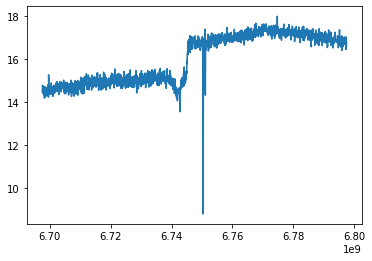

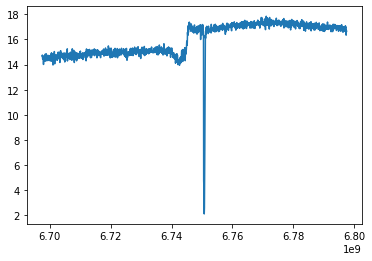

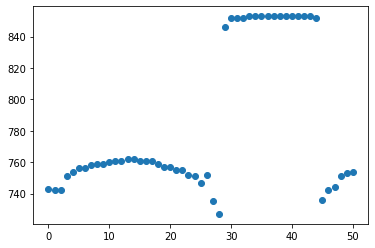

In [10]:
plt.plot(freqs,s21[:,0,29])
plt.figure()
plt.plot(freqs,s21[:,0,44])
print(np.shape(freqs))
print(np.shape(s21))
s21_complex = s21[:,0,:]+1j*s21[:,1,:]
print(np.max(s21[:,0,:]))
#plt.imshow(s21[:,0,:],aspect='auto',origin='lower')
#plt.figure()
#plt.imshow(s21[:,1,:],aspect='auto',origin='lower')
#plt.figure()
#plt.contourf(s21[:,0,:])
#plt.show()
currents = np.arange(0,51,1)
s21_reduced_dim = np.zeros(51)
for i in range(51):
    s21_reduced_dim[i] = np.argmin(s21[:,0,i])
    
plt.figure() 
plt.scatter(currents,s21_reduced_dim)


In [11]:
s21_resfit = np.zeros(51)
print(np.shape(freqs))
print(np.shape(s21_complex[:,i]))
for i in range(51):
    print(i)
    res = Resonator(port_type='notch',f_data=freqs,z_data=s21_complex[:,i])
    res.autofit(fcrop=(6.72,6.78))
    s21_resfit[i] = res.f0
    #res.show()
    #print(res)
#print(s21_resfit)

(1601,)
(1601,)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
fit error = [6.36379152e-06 2.96481968e-01 4.16883663e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
29
fit error = [6.64424333e-06 1.42223238e+00 7.90284096e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
30
31
fit error = [7.19710375e-06 8.41540269e-02 3.16719936e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
32
33
34
35
36
37
38
39
40
41
42
43
44
fit error = [4.78759553e-06 1.11773505e-01 3.66963391e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
45
46
47
48
49
50


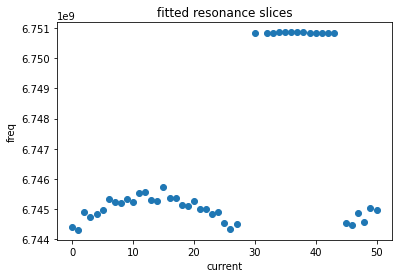

In [12]:
## Visualize fitted resonance slices
plt.scatter(currents,s21_resfit)
plt.xlabel("current");
plt.ylabel("freq");
plt.title("fitted resonance slices")
plt.show()

fit error = [ 1.62613821e-03 -1.56070233e+04 -1.76847102e+08]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))


C:\Users\lfl\AppData\Roaming\Python\Python39\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


AttributeError: 'Resonator' object has no attribute 'z_data_sim'

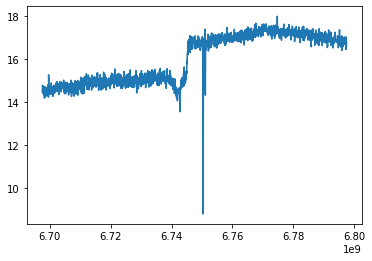

In [13]:
## check res fits that failed
test=29
plt.plot(freqs,s21_complex[:,test])
res = Resonator(port_type='notch',f_data=freqs,z_data=s21_complex[:,test])
res.autofit(fcrop=(6.749,6.76))
res.show()
print(res)

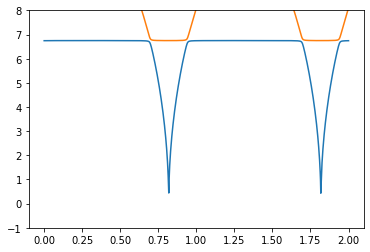

In [26]:
## define fitting functions

#1/2 flux quantum is about 36-14=22 current steps * 10uA/step = 220 uA
from scipy.optimize import curve_fit
import math

def avoided_crossing_lower(x, wq_max, wc, g,phi_offset):
    wc = wc_exp
    wq = wq_max*np.emath.sqrt(abs( (np.cos(np.pi*x-phi_offset))))
    return 1/2*(-np.emath.sqrt(4*g**2+(wc-wq)**2) + np.emath.sqrt(4*g**2+(wc+wq)**2) )

def avoided_crossing_upper(x, wq_max, wc, g, phi_offset):
    wq = wq_max*np.emath.sqrt(abs(np.cos(np.pi*x-phi_offset)))
    return 1/2*(np.emath.sqrt(4*g**2+(wc-wq)**2) + np.emath.sqrt(4*g**2+(wc+wq)**2) )

x = np.linspace(0,2,1000)
plt.plot(x,avoided_crossing_lower(x,11,6.745,.1,1))
plt.plot(x,avoided_crossing_upper(x,11,6.745,.1,1))
plt.ylim([-1,8])
plt.show()

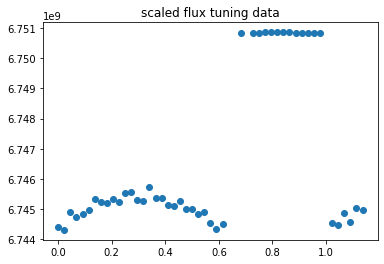

<class 'numpy.float64'>


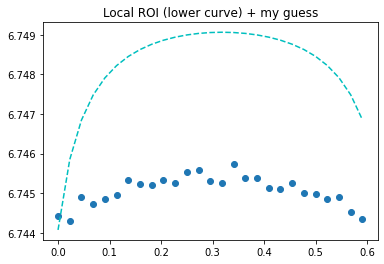

[1226.20913938    6.745         6.48884117    2.74893754]


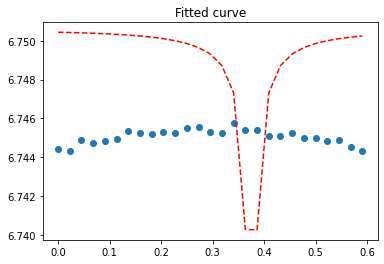

In [27]:
## Fit to lower curve

#Rescale to 1 flux quantum
norm_currents = currents/44
plt.scatter(norm_currents,s21_resfit)
plt.title("scaled flux tuning data")
plt.show()

fit_x = norm_currents[0:27]
fit_y = abs(s21_resfit[0:27])/10**9
print(type(fit_y[1]))
plt.scatter(fit_x,fit_y)
plt.title("Local ROI (lower curve) + my guess")
plt.plot(fit_x,avoided_crossing_lower(fit_x,11,6.745,.1,1),'c--')
plt.show()


popt, pcov = curve_fit(avoided_crossing_lower,fit_x,fit_y,p0=[13,6.745,.01,1])#,p0=[10,6.745,.005,1],bounds=(0,[12,7,2,1]))
print(popt)

plt.scatter(fit_x,fit_y)
plt.plot(fit_x,avoided_crossing_lower(fit_x,*popt),'r--')
plt.title('Fitted curve')
plt.show()
#plt.show()

6.750850313058126


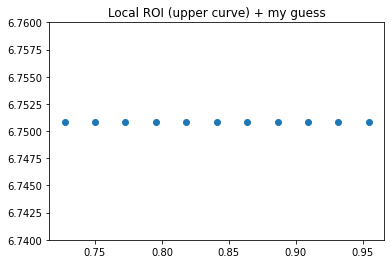

[2.04374599e-01 6.60595407e+00 6.95311746e-01 4.88766752e-04]


In [25]:
## fit to upper curve
fit_x2 = norm_currents[32:43]
fit_y2 = abs(s21_resfit[32:43])/10**9
#print(fit_x2)
#print(fit_y2)
wc_exp = np.mean(fit_y2)
print(wc_exp)
#print(type(fit_y[1]))
plt.scatter(fit_x2,fit_y2)
plt.ylim([6.74,6.76])
plt.title("Local ROI (upper curve) + my guess")
#plt.plot(fit_x2,avoided_crossing_lower(fit_x2,10,6.745,.1,1),'c--')
plt.show()

popt, pcov = curve_fit(avoided_crossing_upper,fit_x2,fit_y2,bounds=(0,[11,7,2,1]))
print(popt)

#plt.scatter(fit_x2,fit_y2)
#plt.plot(fit_x2,avoided_crossing_lower(fit_x2,*popt),'r--')
#plt.title('Fitted curve')
#plt.show()
#plt.show()